In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("Salary_Data.csv")

In [27]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


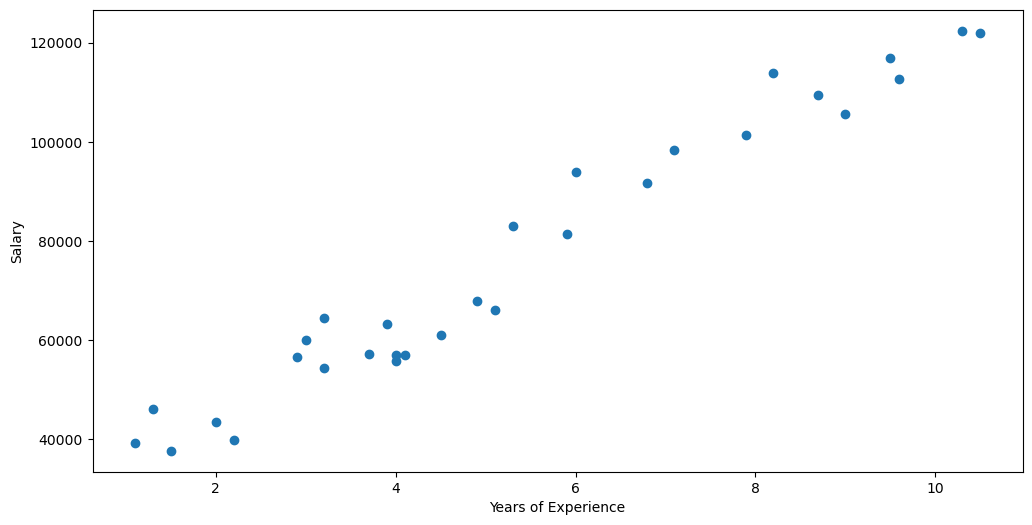

In [10]:
plt.figure(figsize=(12,6))
plt.scatter(data.YearsExperience, data.Salary)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [5]:
X = data.YearsExperience
y = data.Salary

# **Linear Regression via Gradient Descent**

In [6]:
class LinearRegressionGD:
    def __init__(self):       
        self.b0 = 0
        self.b1 = 0
        self.cost_history = []

    def fit(self,X, y, learning_rate, epochs, tolerance):
        n = len(X)
        self.cost_history = []

        for epoch in range(epochs):
            y_pred = self.b0 + self.b1 * X
            error = y - y_pred

            db0 = - (2/n) * np.sum(error)
            db1 = - (2/n) * np.sum(error * X)

            self.b0 -= learning_rate * db0
            self.b1 -= learning_rate * db1

            cost = (1/n) * np.sum(error ** 2)
            self.cost_history.append(cost)
            if epoch > 0 and abs(self.cost_history[-2] - cost) < tolerance:
                break

    def predict(self,X):
        y_pred = self.b0 + self.b1 * X
        return y_pred
    
    def get_params(self):
        return self.b0, self.b1


In [13]:
model = LinearRegressionGD()
model.fit(X,y, learning_rate= 0.01, epochs = 7000, tolerance=1e-6)
b0, b1 = model.get_params()
print(b0,b1)

25792.177149538576 9449.96574184949


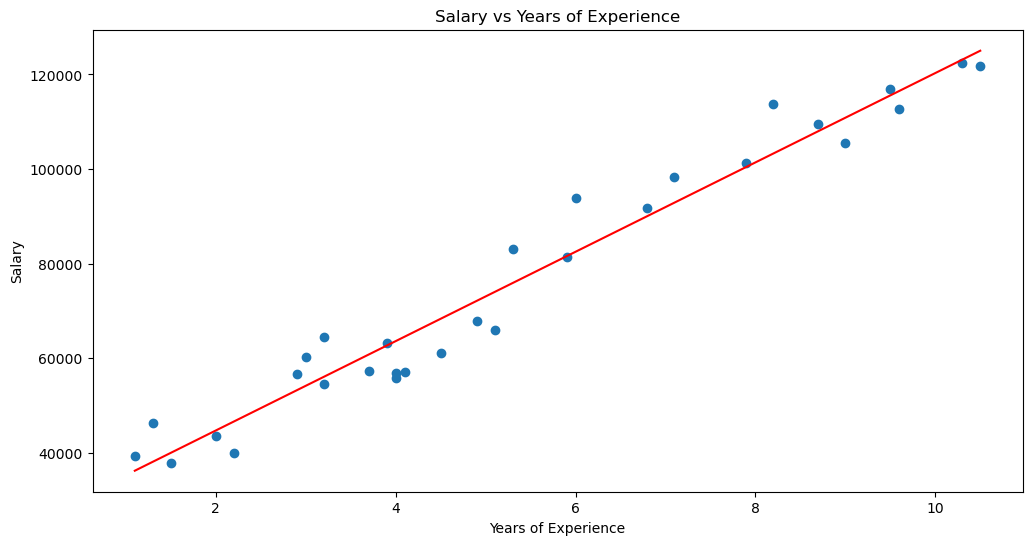

In [26]:
plt.figure(figsize=(12,6))
plt.scatter(data.YearsExperience, data.Salary)
plt.plot(X, b0 + b1 * X, color = 'red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.show()

# **Linear Regression via Closed-Form Solution**

In [35]:
class LinearRegressionCF:
    def __init__(self):
        self.coefficients = None
    def fit(self,X,y):
        ones = np.ones((X.shape[0],1))
        X_b = np.hstack((ones,X.to_numpy().reshape(-1,1)))

        # Normal Equation: β = (XᵀX)⁻¹ Xᵀy
        XTX = X_b.T.dot(X_b)
        XTy = X_b.T.dot(y)
        self.coefficients = np.linalg.inv(XTX).dot(XTy)

    def predict(self):
        ones = np.ones((X.shape[0],1))
        X_b = np.hstack((ones,X.to_numpy().reshape(-1,1)))
        y_pred = X_b.dot(self.coefficients)
        return y_pred
    def get_params(self):
        b0 = self.coefficients[0]
        b1 = self.coefficients[1]
        return b0,b1

In [36]:
model = LinearRegressionCF()
model.fit(X,y)
b0,b1 = model.get_params()
print(b0,b1)

25792.20019866865 9449.96232145508


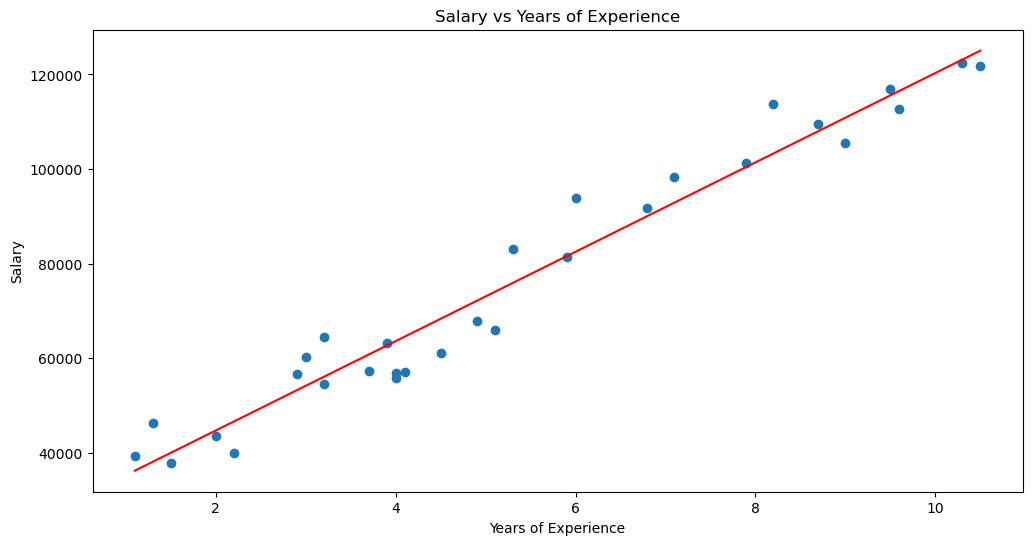

In [37]:
plt.figure(figsize=(12,6))
plt.scatter(data.YearsExperience, data.Salary)
plt.plot(X, b0 + b1 * X, color = 'red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.show()

# **Cross-Verifying Output with Scikit-learn's Implementation**

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
X = np.array(data[data.columns[0]]).reshape(-1,1) # exogenuous variable must be 2D
y = np.array(data[data.columns[1]])

model = LinearRegression()
model.fit(X,y)

print(model.intercept_)
print(model.coef_[0])

25792.20019866871
9449.962321455074
